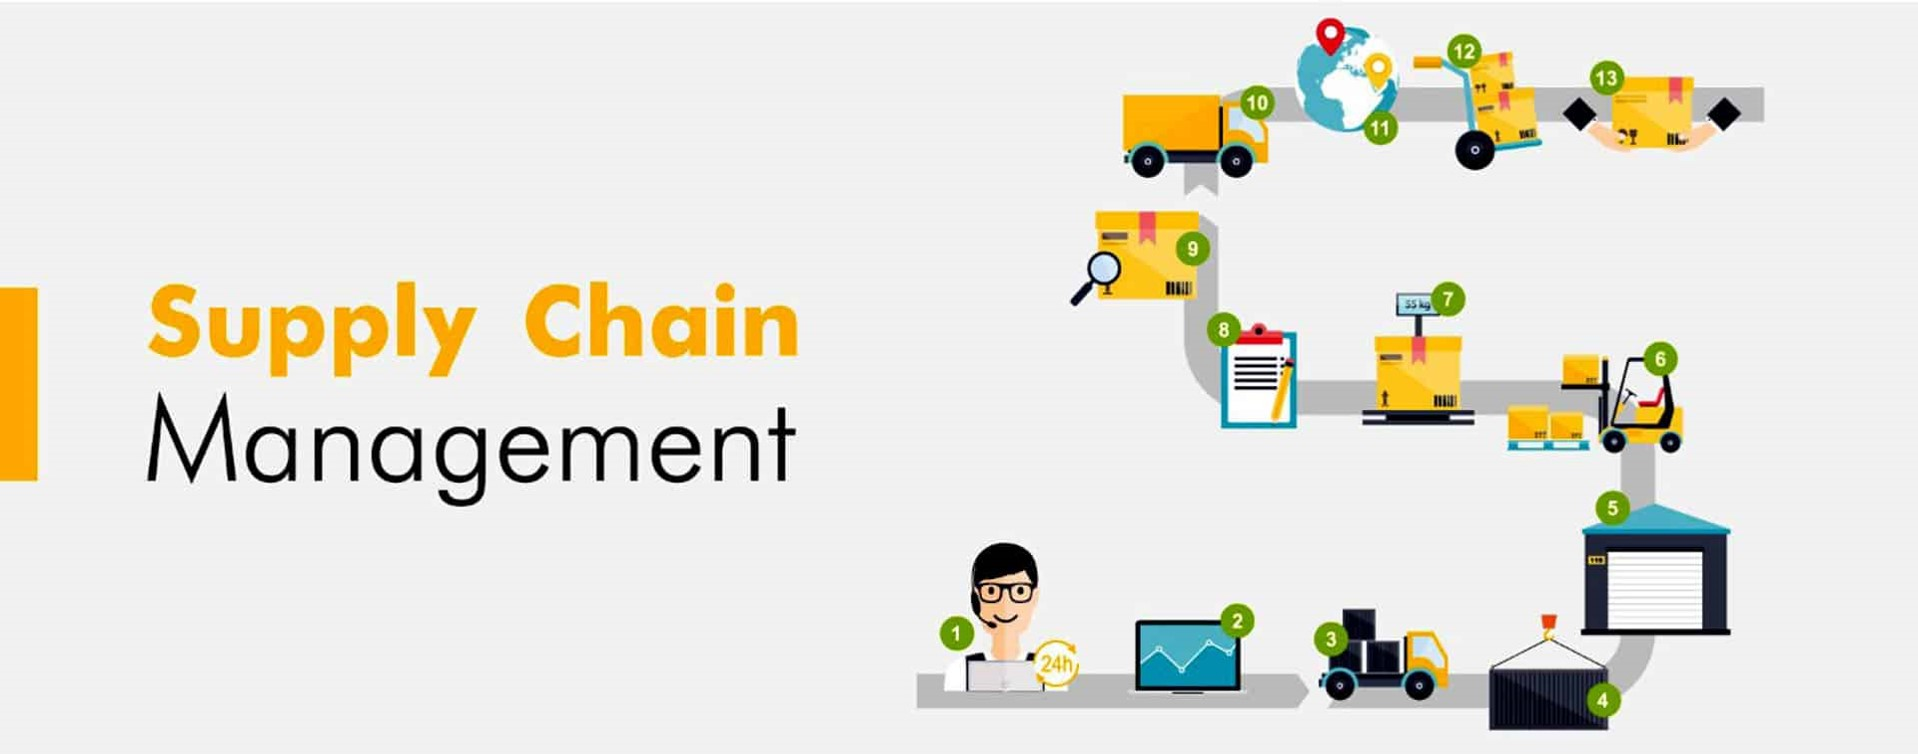

#### Submitted by Subham Patel

## Problem Statment

##### An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in every warehouse in the entire country.

## Goal & objectives

###### This exercise aims to build a model, using historical data that will determine the optimum weight of the product to be shipped each time to the warehouse.
###### Also, try to analyze the demand pattern in different pockets of the country so management can drive the advertisement campaign, particularly in those pockets.
###### This is the first phase of the agreement; hence, the company has shared very limited information. Once you are able to showcase a tangible impact with this much information then the company will open the 360-degree data lake for your consulting company to build a more robust model.

###### Importing Important Libraties to work:


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib  inline
import warnings
warnings.filterwarnings('ignore')

##### Reading data with the help of Pandas

In [3]:
df=pd.read_csv('Desktop/Project DS 13 29th Nov 2023/Dataset.csv')

##### Basic EDA to understand the Data

In [4]:
pd.set_option('display.max_columns',30)
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,0,0,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,0,0,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,1,0,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,0,0,1,60,25.0,NaN,18,0,A,6,30,25093


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

#### We can obseve that there is some missing values & there are object type data which we have to change into "int" type

In [19]:
df.shape

(25000, 24)

###### We have 25000 rows and 24 columns(Features)

In [32]:
df.duplicated().sum()

0

###### We dont have any duplicacy inside the data

In [20]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


##### From the above description table we can observe there no outlier as we can get idea from the mean,max.In futher we can do outlier checking with the help of IQR method

In [23]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

###### To check all the columns

In [27]:
df.isnull().sum()*100/len(df)

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

##### we can see that wh_est_year having missing value more than 45% which we have to drop after further analysis at the stage of data preparining

#### From the above missing values table we also can find there is 4% missing values in both approved_wh_govt_certificate & workers_num,Which we can take care by using imputization methods.

## Missing Values Treatment

In [37]:
df.workers_num.fillna(df.workers_num.mean(),inplace=True)

In [42]:
df.approved_wh_govt_certificate.fillna(df.approved_wh_govt_certificate.mode()[0],inplace=True)

In [46]:
df.drop(['wh_est_year'],axis=1,inplace=True)

In [216]:
df.isnull().sum()*100/len(df)  #Recheking with all null values

Location_type                   0.0
WH_capacity_size                0.0
zone                            0.0
WH_regional_zone                0.0
num_refill_req_l3m              0.0
transport_issue_l1y             0.0
Competitor_in_mkt               0.0
retail_shop_num                 0.0
wh_owner_type                   0.0
distributor_num                 0.0
flood_impacted                  0.0
flood_proof                     0.0
electric_supply                 0.0
dist_from_hub                   0.0
workers_num                     0.0
storage_issue_reported_l3m      0.0
temp_reg_mach                   0.0
approved_wh_govt_certificate    0.0
wh_breakdown_l3m                0.0
govt_check_l3m                  0.0
product_wg_ton                  0.0
dtype: float64

#### Please note :
 ######         1.We have treated the missing values of workers_num  as it was approx 4% with  "mean" as it is numerical and no outlier present .
 ######    2.Treated the approved_wh_govt_certificate as it was approx 4%  with "mode" as it is categorical column
 ######    3. Dropped the column of "ware house estimated  year feature" as it has 47% missing values and also it is not much important factor to our dependent feature .

### Feature Engineering

In [49]:
df['WH_regional_zone']=df['WH_regional_zone'].apply(lambda x:x[-1])    ### Removing the Zone from "WH_reginal _zone"

In [52]:
df['WH_regional_zone']=pd.to_numeric(df.WH_regional_zone)   ##Converting the object type to int type

In [53]:
df.head()  

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  int64  
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

we have removed the text part from "WH_regional_zone" and now it became int type

## Explarotary Data Analysis(EDA)

#### Using Pandas Profiling,Dtale Automation tools to get insights

In [210]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("output_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

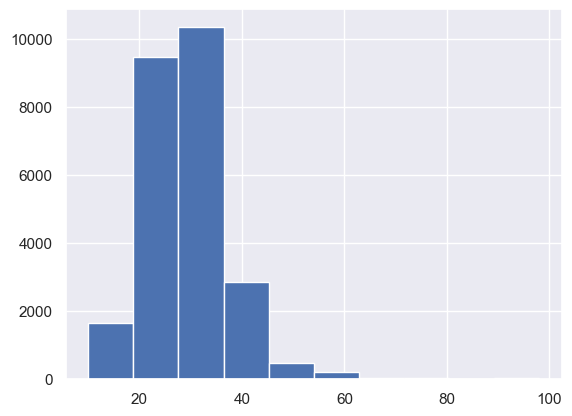

In [55]:
df['workers_num'].hist()

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

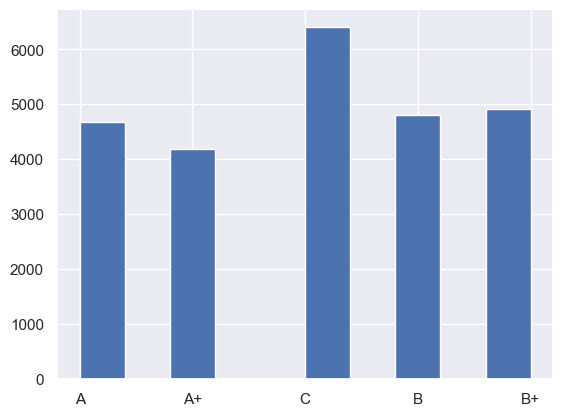

In [59]:
df['approved_wh_govt_certificate'].hist()
df['approved_wh_govt_certificate'].value_counts()

###### Most of the Warehouse got C and followed by  B+,B type certificate from WDRA(Govt auth of concern dept)

[Text(0.5, 1.0, 'Location wise Zone')]

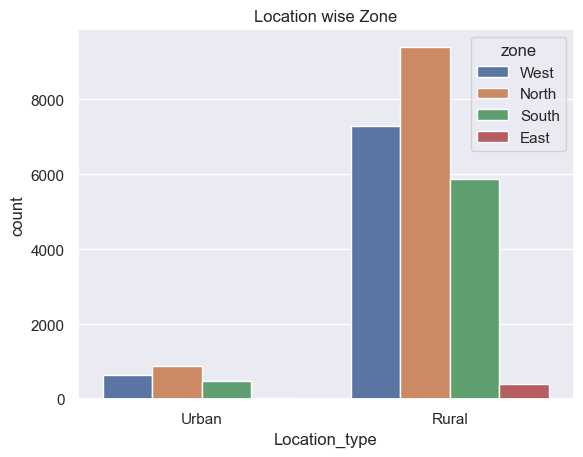

In [67]:
sns.countplot(df,x='Location_type',hue='zone').set(title='Location wise Zone')

##### Observed that Most of the warehouse are placed in Rural Side

In [220]:
df.groupby(['approved_wh_govt_certificate'], dropna=True).aggregate({'wh_owner_type': ["count"]})

,wh_owner_type
,count
approved_wh_govt_certificate,
A,4671
A+,4191
B,4812
B+,4917
C,6409


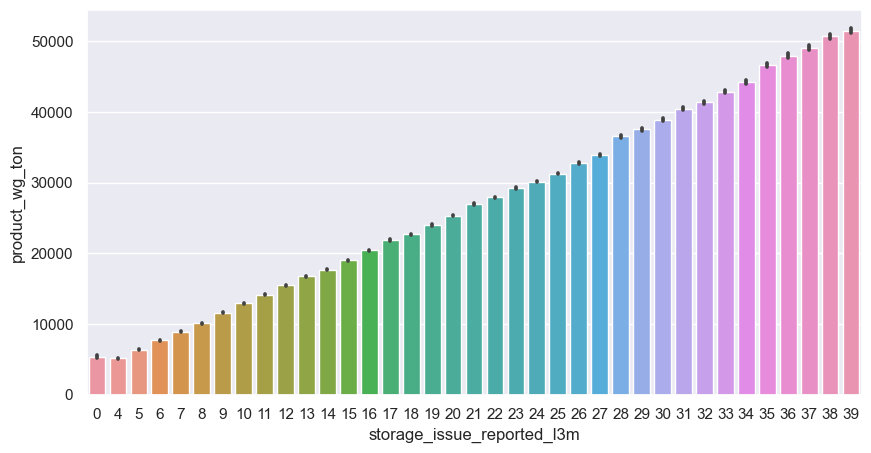

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(df,x='storage_issue_reported_l3m',y='product_wg_ton')
sns.title='stroge issues vs prediction'

###### As the production raise simountaniously the issues in the warehouse also increases. So "storage_issoe_reported" is corelated to dependent feature

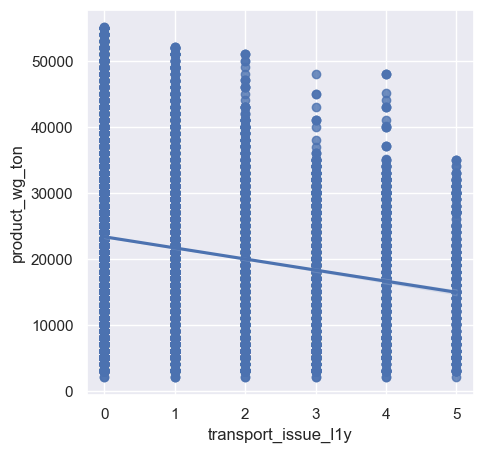

In [77]:
plt.figure(figsize=(5,5))
sns.regplot(df,x='transport_issue_l1y',y='product_wg_ton')
sns.title='transport issues vs prediction'

###### we got the evidence that if there is  issue on transport then there is problem in our production 

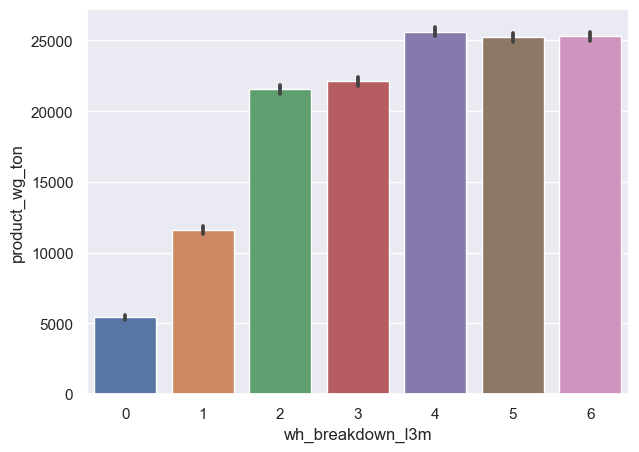

In [79]:
plt.figure(figsize=(7,5))
sns.barplot(df,x='wh_breakdown_l3m',y='product_wg_ton')
sns.title='warehousebreakdown vs production'

###### we can figureout that more breakdown are happening in the warehouse due to more production storage inside it 

<Axes: xlabel='wh_owner_type', ylabel='count'>

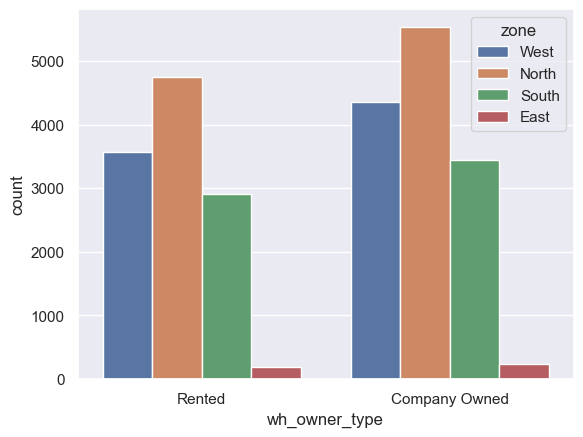

In [91]:
sns.countplot(df,x='wh_owner_type',hue='zone')

###### Most of warehouse are owned by company but not much difference between company owned and rented

###### Will check correlation between independent varibale but before that i need to check data type of all into  int type .So applying labeling on categorical variables.Also i have to drop 'Ware_house_ID' and 'WH_Manager_ID' as it not going to contribute anything to depedent feature

In [106]:
df.drop(['Ware_house_ID', 'WH_Manager_ID'],axis=1,inplace=True)

In [107]:
obj_typ_fea=df.select_dtypes(include='object')
obj_typ_fea.columns


Index(['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [108]:
oblist=['Location_type', 'WH_capacity_size',
       'zone', 'wh_owner_type', 'approved_wh_govt_certificate']

In [109]:
data=pd.get_dummies(df,columns=oblist,prefix=oblist,drop_first=True)

In [110]:
data.head()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,0,1


In [111]:
data.shape

(25000, 27)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 25000 non-null  int64  
 1   num_refill_req_l3m               25000 non-null  int64  
 2   transport_issue_l1y              25000 non-null  int64  
 3   Competitor_in_mkt                25000 non-null  int64  
 4   retail_shop_num                  25000 non-null  int64  
 5   distributor_num                  25000 non-null  int64  
 6   flood_impacted                   25000 non-null  int64  
 7   flood_proof                      25000 non-null  int64  
 8   electric_supply                  25000 non-null  int64  
 9   dist_from_hub                    25000 non-null  int64  
 10  workers_num                      25000 non-null  float64
 11  storage_issue_reported_l3m       25000 non-null  int64  
 12  temp_reg_mach     

##### Applying Heatmap

<Axes: >

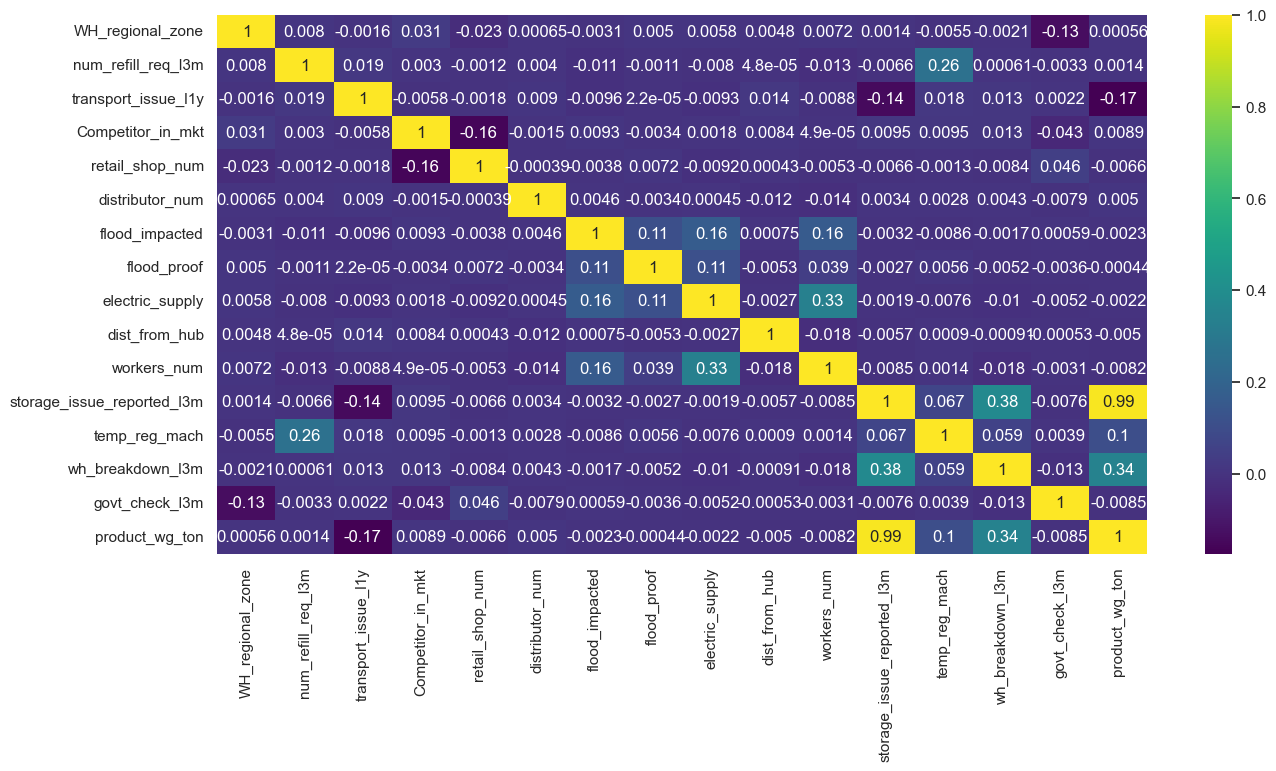

In [119]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

###### Let's Check if ther is any outlier present   with the help of boxplot

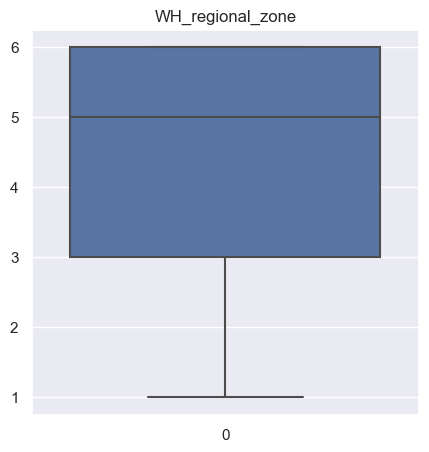

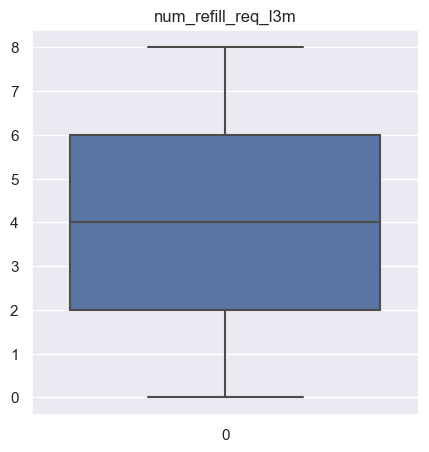

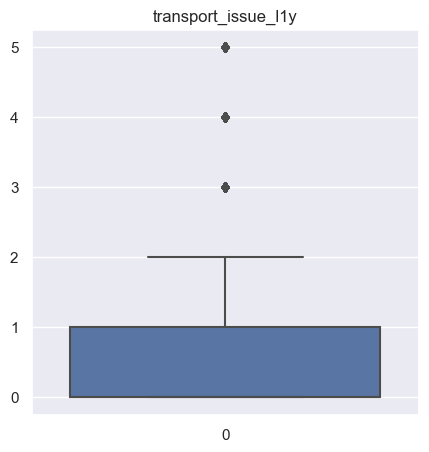

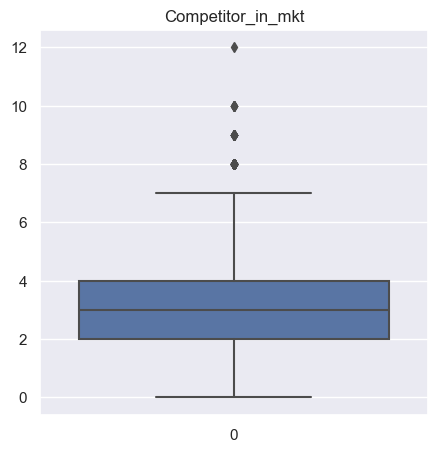

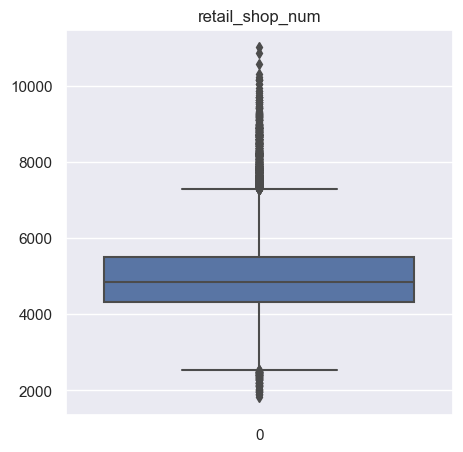

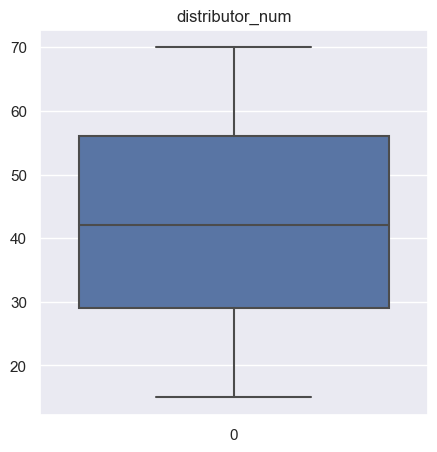

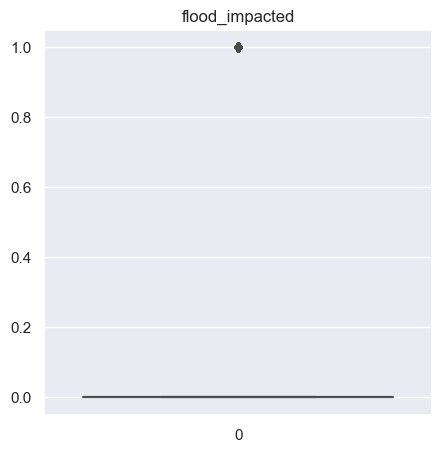

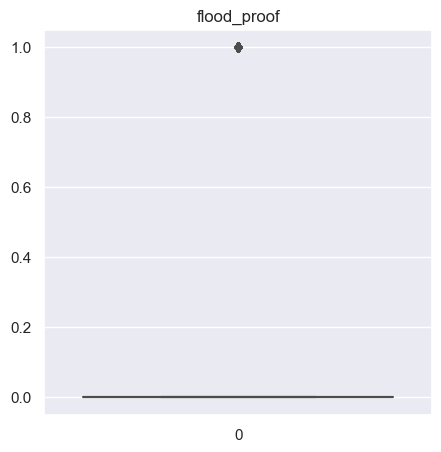

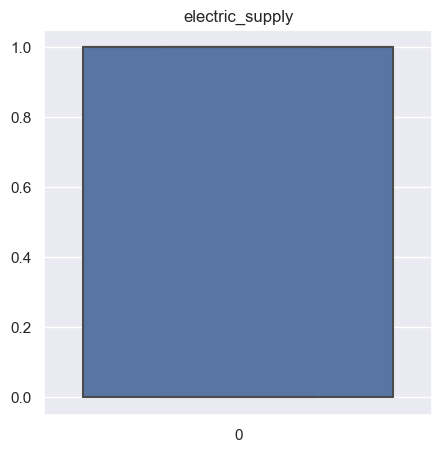

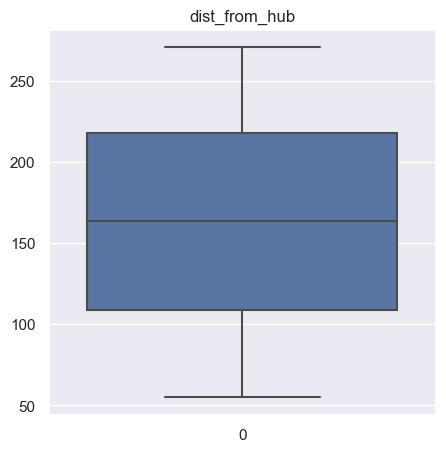

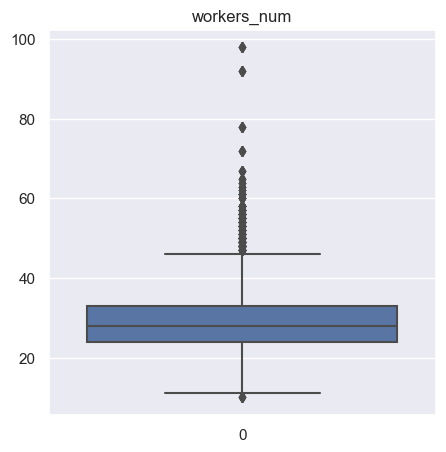

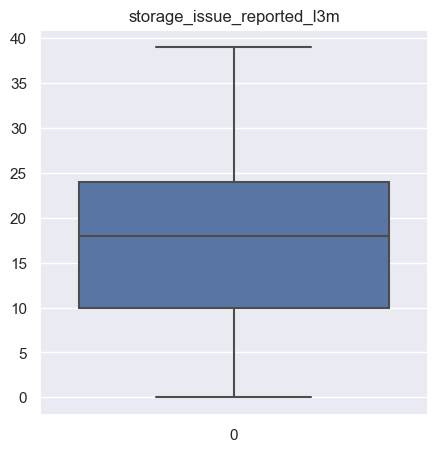

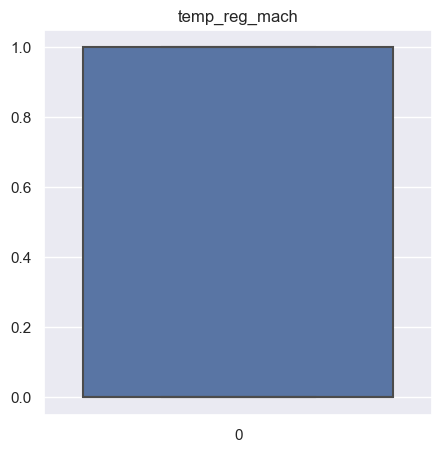

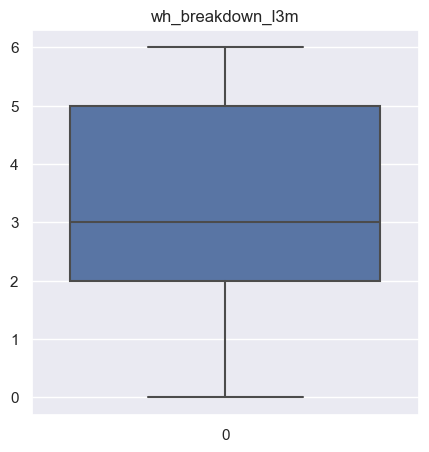

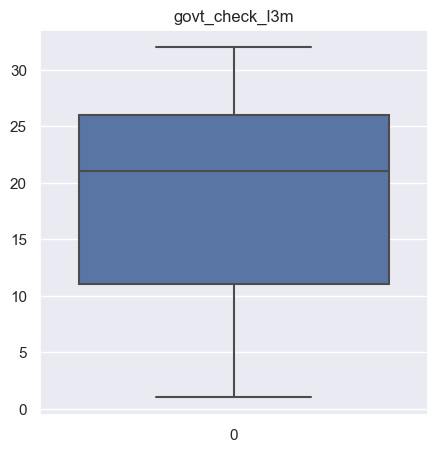

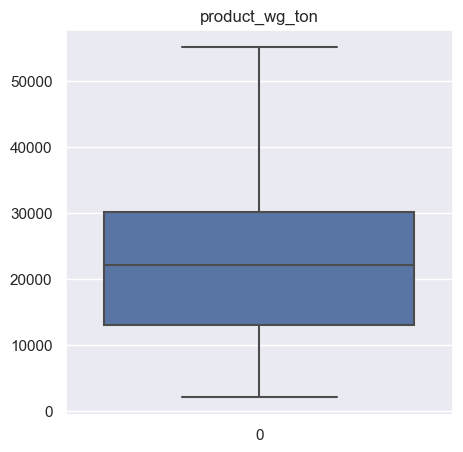

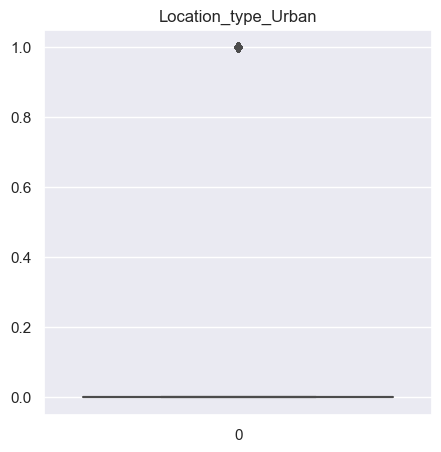

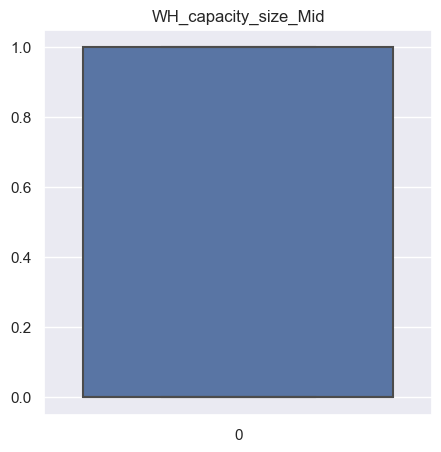

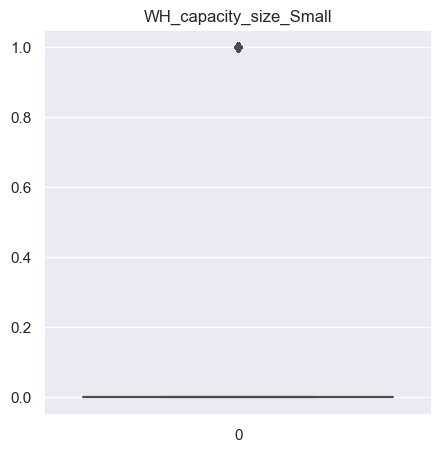

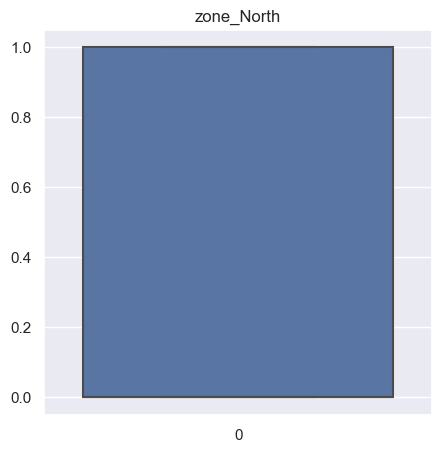

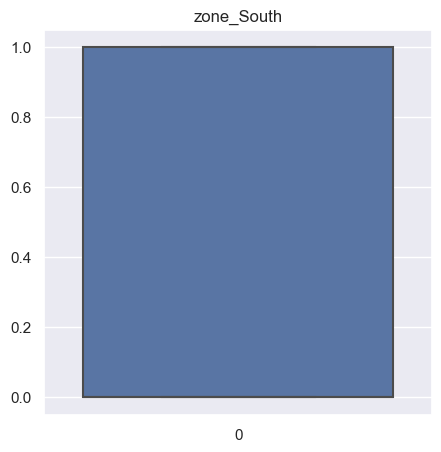

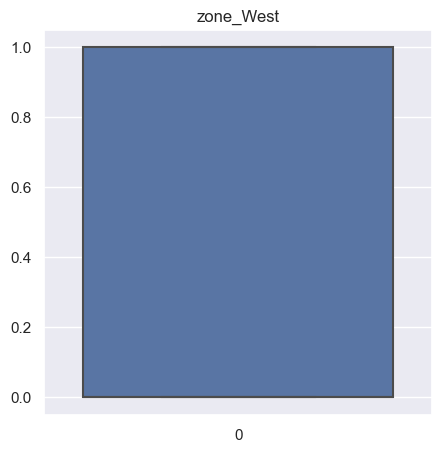

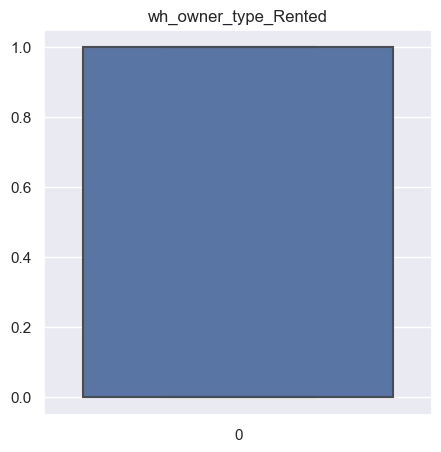

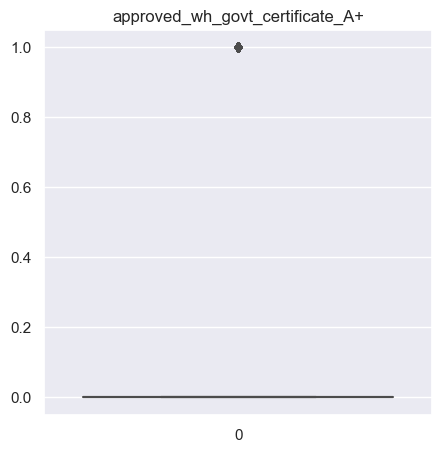

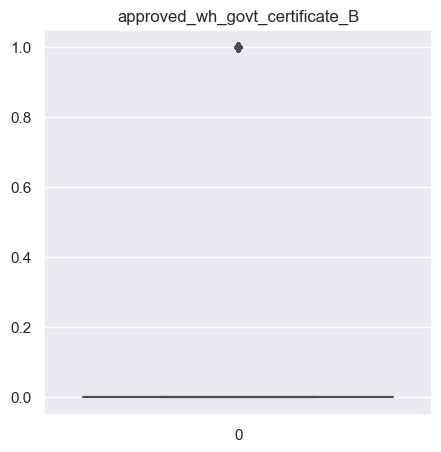

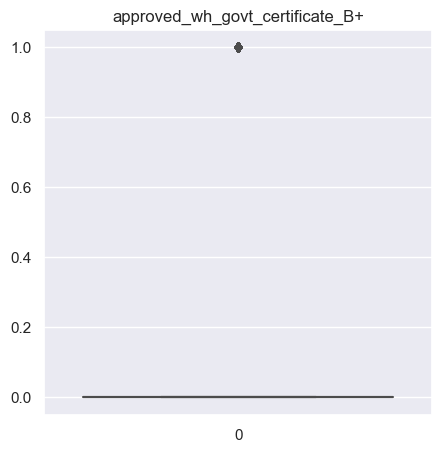

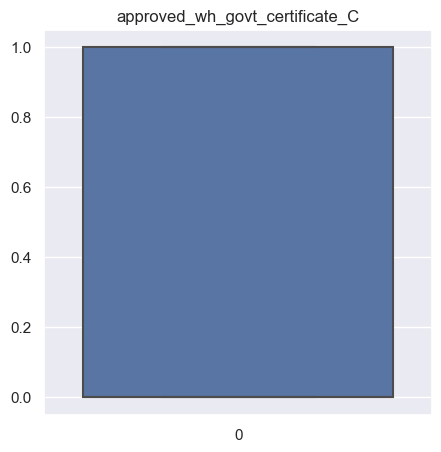

In [128]:
for  i in data.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

##### The values which are outpur I5 range are not outlier ,they are seem to be only numbers which are very much possible in real scenerio

### Spliting the data into Dependent and Independent variables

In [129]:
x=data.drop(['product_wg_ton'],axis=1) #Dropping the target variable

In [130]:
y=data['product_wg_ton']

In [133]:
x.shape

(25000, 26)

### Checking the important feature with the help of feature importance using RandomForest

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [134]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [135]:
model_rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [137]:
model_rf.fit(x,y)

RandomForestRegressor(random_state=42)

In [141]:
fi=model_rf.feature_importances_

In [143]:
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': fi})

In [144]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [145]:
print(feature_importance_df)

                            Feature  Importance
11       storage_issue_reported_l3m    0.982799
23   approved_wh_govt_certificate_B    0.004353
24  approved_wh_govt_certificate_B+    0.004237
2               transport_issue_l1y    0.001133
4                   retail_shop_num    0.000909
12                    temp_reg_mach    0.000863
9                     dist_from_hub    0.000859
5                   distributor_num    0.000784
10                      workers_num    0.000702
1                num_refill_req_l3m    0.000610
14                   govt_check_l3m    0.000591
13                 wh_breakdown_l3m    0.000423
22  approved_wh_govt_certificate_A+    0.000313
3                 Competitor_in_mkt    0.000282
0                  WH_regional_zone    0.000245
25   approved_wh_govt_certificate_C    0.000120
21             wh_owner_type_Rented    0.000109
8                   electric_supply    0.000098
19                       zone_South    0.000088
18                       zone_North    0

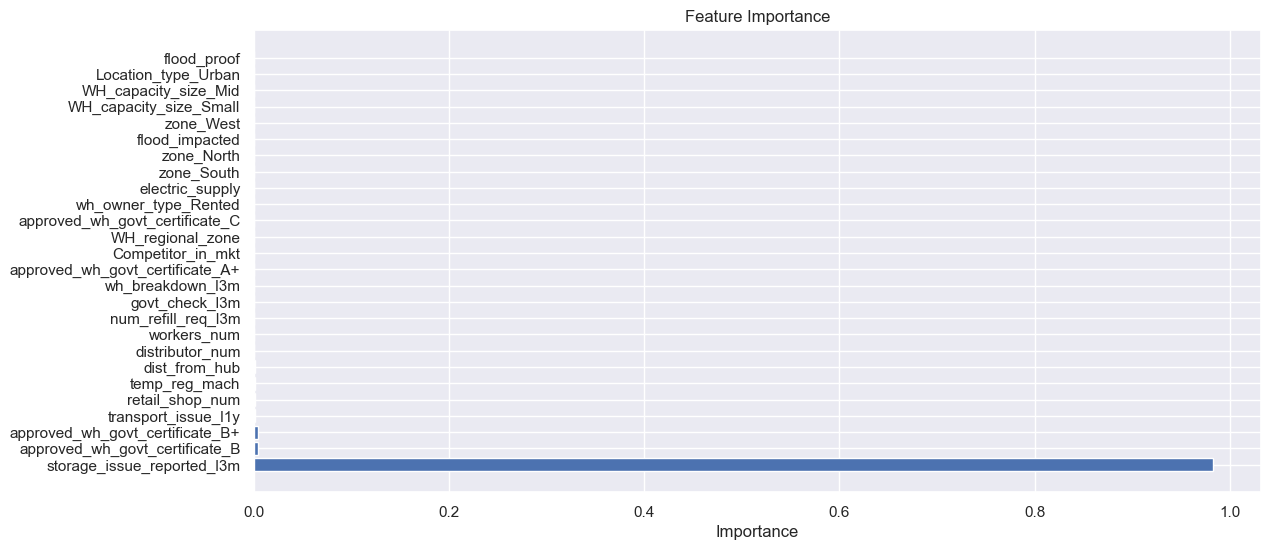

In [156]:
plt.figure(figsize=(13, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

###### From the feauture importance technique the main independent feature which is affecting the dependent feature is storage issue reported followed by wh_govt_certificate ,transport issue

### Spliting Dataset intoTrain & Test for Modeling

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

##### Feature scalling with Normalisation

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [215]:
mmscaler=MinMaxScaler(feature_range=(0,1)) # setting the range between 0 to 1.
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)

In [189]:
y_train

6920     13085
17926    29143
1123     31101
4518     33112
5576     27089
         ...  
21575    26107
5390     20147
860      26109
15795    23134
23654    22062
Name: product_wg_ton, Length: 18750, dtype: int64

## Model Builiding

##### Calling all the required algorith and performance metrices

In [190]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [199]:
def evaluate_function(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_sqaure=r2_score(true,predicted)
    return  mae,mse,rmse,r2_sqaure

In [202]:
models={
    "Linear Regression":LinearRegression(),
    "Decission Tree": DecisionTreeRegressor(),
    "Support Vector Reg": SVR(),
    "RandomForest" : RandomForestRegressor(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "Gradient Boost": GradientBoostingRegressor(),
    "XGBoost":XGBRegressor()
}

model_list=[]
r2_list=[]

for model_name, model in models.items():
    model.fit(x_train, y_train)


    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #Evaluate train and test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_function(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_function(y_test,y_test_pred)
    
    
    model_list.append(model_name)
    r2_list.append(model_test_r2)
    
    print(f"Model performance of {model_name} on Training set")
    print("Root Mean square Error : {:.5f}".format(model_train_rmse))
    print("Mean Square Error : {:.5f}".format(model_train_mse))
    print("Mean Absolute Error : {:.5f}".format(model_train_mae))
    print("R2 Score : {:.5f}".format(model_train_r2))
    print("------------------------------------------------------------------------------")
    
    print(f"Model performance of {model_name} on Test set")
    print("Root Mean square Error : {:.5f}".format(model_test_rmse))
    print("Mean Square Error : {:.5f}".format(model_test_mse))
    print("Mean Absolute Error : {:.5f}".format(model_test_mae))
    print("R2 Score : {:.5f}".format(model_test_r2))
    
    print("******" * 20)
    print('\n')
    
   
    

Model performance of Linear Regression on Training set
Root Mean square Error : 1387.40351
Mean Square Error : 1924888.49538
Mean Absolute Error : 1008.00735
R2 Score : 0.98570
------------------------------------------------------------------------------
Model performance of Linear Regression on Test set
Root Mean square Error : 1400.51165
Mean Square Error : 1961432.89431
Mean Absolute Error : 1012.33646
R2 Score : 0.98549
************************************************************************************************************************


Model performance of Decission Tree on Training set
Root Mean square Error : 0.00000
Mean Square Error : 0.00000
Mean Absolute Error : 0.00000
R2 Score : 1.00000
------------------------------------------------------------------------------
Model performance of Decission Tree on Test set
Root Mean square Error : 1318.26502
Mean Square Error : 1737822.66480
Mean Absolute Error : 885.32880
R2 Score : 0.98715
**************************************

In [207]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Gradient Boost,0.993565
3,RandomForest,0.993327
7,XGBoost,0.993171
1,Decission Tree,0.987148
4,Lasso,0.985498
0,Linear Regression,0.985495
5,Ridge,0.985488
2,Support Vector Reg,0.021209


#####Model performance of Gradient Boost on Training set
Root Mean square Error : 934.69354
Mean Square Error : 873652.01790
Mean Absolute Error : 694.97912
R2 Score : 0.99351
------------------------------------------------------------------------------
Model performance of Gradient Boost on Test set
Root Mean square Error : 932.83624
Mean Square Error : 870183.45205
Mean Absolute Error : 698.07810
R2 Score : 0.99356

### Plot Y_test Actual vs Y_test Predict

Text(0, 0.5, 'Predicted')

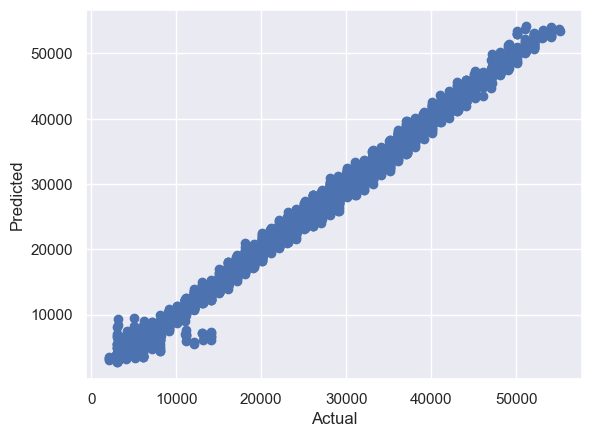

In [209]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

###### Upon creating a plot that compares predictions against actual values, a remarkable observation emerges: a significant proportion of the predictions align remarkably closely with the actual values. This suggests that the predictive model is effectively capturing the underlying patterns within the data, resulting in accurate forecasts that closely resemble the true outcomes.